## Hotel booking cancellation

Business Understanding :

Problem statement :
> A hotel booking company is experiencing a loss in revenue due to unpredictable booking cancellations made by its customers. The company's objective is to tackle this uncertainty by predicting which customers are more likely to cancel their reservations. The ultimate aim of this solution is to help the company identify customers with a higher probability of canceling their bookings. This, in turn, enables the company to implement proactive strategies such as providing incentives or sending special reminders to mitigate the cancellation rate, ultimately leading to increased revenue.

Objective :
> Prediction of Booking Cancellations: The primary goal is to accurately predict whether a customer's booking will be canceled or not. This prediction can provide valuable insights to the hotel booking company and help them allocate resources effectively.


### 1. Data Understanding

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/dibimbing.id/hotel/'

In [ ]:
# import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split, cross_val_score
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# read csv
df_train = pd.read_csv(folder_path + 'train.csv')

In [ ]:
pd.set_option('display.max_columns', 33)

# show 5 first data
df_train.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,"Crystal Cove, Barbados Barbados",0,8,2019,January,2,10,0,4,2,0.0,0,BB,ITA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,314.0,NaN,0,Transient,38.40,0,0,Check-Out,2019-01-14,1
1,"Greensboro Courtyard Greensboro, NC",1,524,2018,December,51,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.80,0,0,Canceled,2017-10-21,2
2,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",1,175,2019,May,20,19,1,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,12.0,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,3
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,NaN,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,200.0,0,Transient,45.00,0,0,Check-Out,2018-10-18,4
4,"W New York – Union Square New York, NY",1,33,2017,September,39,26,2,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,16.0,NaN,0,Transient,57.92,0,1,Canceled,2017-08-24,5


In [ ]:
# check info data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83293 entries, 0 to 83292
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           83293 non-null  object 
 1   is_canceled                     83293 non-null  int64  
 2   lead_time                       83293 non-null  int64  
 3   arrival_date_year               83293 non-null  int64  
 4   arrival_date_month              83293 non-null  object 
 5   arrival_date_week_number        83293 non-null  int64  
 6   arrival_date_day_of_month       83293 non-null  int64  
 7   stays_in_weekend_nights         83293 non-null  int64  
 8   stays_in_week_nights            83293 non-null  int64  
 9   adults                          83293 non-null  int64  
 10  children                        83290 non-null  float64
 11  babies                          83293 non-null  int64  
 12  meal                            

Data has 33 columns with 83293 rows.

**is_canceled** will be target for machine learning model.

### 2. Data Cleaning

In [ ]:
# calculate null value in every column
df_train.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              3
babies                                0
meal                                  0
country                             346
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             11404
company                           78559


column has null value are :

children have 3 rows.

country have 346 rows.

agent have 11404 rows.

company have 78559 rows

In [ ]:
# calculate percentage null value
def calculate_null_percentage(dataframe):
    total_rows = len(dataframe)
    null_counts = dataframe.isnull().sum()
    null_percentage = (null_counts / total_rows) * 100
    return round(null_percentage, 4)

calculate_null_percentage(df_train)

hotel                              0.0000
is_canceled                        0.0000
lead_time                          0.0000
arrival_date_year                  0.0000
arrival_date_month                 0.0000
arrival_date_week_number           0.0000
arrival_date_day_of_month          0.0000
stays_in_weekend_nights            0.0000
stays_in_week_nights               0.0000
adults                             0.0000
children                           0.0036
babies                             0.0000
meal                               0.0000
country                            0.4154
market_segment                     0.0000
distribution_channel               0.0000
is_repeated_guest                  0.0000
previous_cancellations             0.0000
previous_bookings_not_canceled     0.0000
reserved_room_type                 0.0000
assigned_room_type                 0.0000
booking_changes                    0.0000
deposit_type                       0.0000
agent                             

Column that has more than or equal to 50% null value will be deleted, its because of the column lose big information(does not have enough information). So **Company** will be deleted.

In [ ]:
# delete company column
df_train = df_train.drop(columns='company')

In [ ]:
# fill any missing value

# children column
df_train.children.value_counts()

0.0     77329
1.0      3351
2.0      2558
3.0        51
10.0        1
Name: children, dtype: int64

Because the missing is just 3 rows and the mode for children is 0, so this missing will be filled with 0.

In [ ]:
# fill missing value
df_train.loc[df_train.children.isnull(),'children'] = df_train.children.mode()[0]

In [ ]:
# Fill in any missing values

# For the 'country' column:
# If 'is_repeated_guest' is 1, the 'country' will be filled with the mode from the same hotel.
# If 'is_repeated_guest' is 0, the 'country' will be filled with the mode from the same hotel.
# This is done to address the cross-information issue.

def fill_country_based_on_repeated_guest(dataframe):
    for index, row in dataframe.iterrows():
        if pd.isnull(row['country']):
            if row['is_repeated_guest'] == 1:
                mode_country = dataframe[(dataframe['is_repeated_guest'] == 1) & (dataframe['hotel'] == row['hotel'])]['country'].mode()
            else:
                mode_country = dataframe[(dataframe['is_repeated_guest'] == 0) & (dataframe['hotel'] == row['hotel'])]['country'].mode()
            if not mode_country.empty:
                dataframe.at[index, 'country'] = mode_country.iloc[0]
    return dataframe

df_train = fill_country_based_on_repeated_guest(df_train)


In [ ]:
# Fill in any missing values

# For the 'agent' column:
df_train[df_train.agent.isnull()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
3,Courtyard by Marriott Aberdeen Airport Aberdee...,0,0,2018,October,43,17,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,0,Transient,45.0,0,0,Check-Out,2018-10-18,4
12,Sheraton Grand Rio Hotel & Resort Rio de Janei...,1,101,2018,June,27,27,1,5,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,0,Transient,140.0,0,0,Canceled,2018-05-06,13
14,"The Ritz-Carlton, Berlin Berlin, Germany",0,63,2017,September,36,1,0,4,2,1.0,0,HB,PRT,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,142.5,0,1,Check-Out,2017-09-05,15
19,"Treasure Beach, Barbados Barbados",0,102,2019,April,17,24,1,3,2,0.0,0,BB,IRL,Groups,TA/TO,0,0,0,A,A,0,No Deposit,NaN,0,Transient-Party,100.0,0,0,Check-Out,2019-04-28,20
29,"Hotel Alfonso XIII, a Luxury Collection Hotel,...",1,55,2018,July,28,7,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,0,No Deposit,NaN,0,Transient-Party,79.0,0,0,Canceled,2018-07-06,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83247,"Crystal Cove, Barbados Barbados",0,0,2019,January,3,16,1,2,1,0.0,0,Undefined,PRT,Groups,Direct,0,0,0,A,H,0,No Deposit,NaN,0,Transient-Party,55.0,0,0,Check-Out,2019-01-19,83248
83255,"Protea Hotel by Marriott Midrand Midrand, Sout...",0,0,2018,April,18,26,0,2,1,0.0,0,BB,PRT,Direct,Direct,0,0,0,A,A,0,No Deposit,NaN,0,Transient,47.7,0,0,Check-Out,2018-04-28,83256
83260,"Las Vegas Marriott Las Vegas, NV",0,60,2018,April,18,25,1,0,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,1,A,A,0,No Deposit,NaN,0,Transient-Party,65.0,0,0,Check-Out,2018-04-26,83261
83284,"W New York – Union Square New York, NY",0,37,2017,August,34,16,1,0,1,0.0,0,BB,PRT,Groups,Corporate,0,0,0,A,A,0,No Deposit,NaN,0,Transient-Party,172.0,0,0,Check-Out,2017-08-17,83285


In [ ]:
# adults, babies and children cant be zero at same time, so dropping the rows having all these zero at same time

filter = (df_train.children == 0) & (df_train.adults == 0) & (df_train.babies == 0)
df_train[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
1377,Sheraton Grand Rio Hotel & Resort Rio de Janei...,0,37,2018,November,47,17,1,3,0,0.0,0,SC,BRA,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9.0,0,Transient,97.40,1,1,Check-Out,2018-11-21,1378
1726,Protea Hotel by Marriott Cape Town Sea Point C...,0,31,2018,December,53,27,2,8,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,D,D,3,No Deposit,NaN,0,Transient,28.00,1,0,Check-Out,2019-01-06,1727
1991,Sheraton Mexico City Maria Isabel Hotel Mexico...,0,0,2019,February,9,27,0,0,0,0.0,0,BB,PRT,Online TA,TA/TO,1,0,0,A,K,0,No Deposit,85.0,0,Transient,0.00,0,0,Check-Out,2019-02-27,1992
2036,Baton Rouge Acadian Centre/LSU Area Courtyard ...,0,0,2017,August,33,10,9,20,0,0.0,0,SC,PRT,Online TA,Direct,0,0,0,E,K,20,No Deposit,NaN,0,Transient,0.00,0,0,Check-Out,2017-09-08,2037
2401,"Orlando Airport Courtyard Orlando, FL",0,0,2017,December,52,24,0,0,0,0.0,0,BB,FRA,Offline TA/TO,TA/TO,1,0,0,D,K,0,No Deposit,28.0,0,Transient,0.00,0,1,Check-Out,2017-12-24,2402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80658,Courtyard by Marriott Toulouse Airport Toulous...,1,1,2017,September,37,6,2,0,0,0.0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,0,No Deposit,1.0,0,Transient-Party,0.00,0,0,Canceled,2017-09-05,80659
81486,Courtyard by Marriott Toulouse Airport Toulous...,1,0,2019,August,32,11,0,0,0,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,P,P,0,No Deposit,NaN,0,Transient,0.00,0,0,Canceled,2019-08-11,81487
82012,Protea Hotel Fire & Ice! by Marriott Cape Town...,1,173,2018,April,15,8,2,3,0,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,21.0,0,Transient-Party,0.00,0,0,Canceled,2018-03-29,82013
82681,"Tamarind, Barbados Barbados",0,177,2018,December,53,30,2,5,0,0.0,0,BB,PRT,Direct,Direct,0,0,0,E,K,2,No Deposit,NaN,0,Transient,1.29,0,2,Check-Out,2019-01-06,82682


In [ ]:
df_train = df_train[~filter]

### 3. Exploratory Data Analysis

1. **Guest Origins and Spatial Analysis**: Where do the guests come from? Perform a spatial analysis to understand their geographical distribution.

2. **Room Rates per Night**: What is the average cost for guests per room per night?

3. **Nightly Price Variations Across the Year**: How does the price per night fluctuate throughout the year?

4. **Busiest Months**: During which months is the hotel most occupied?

5. **Duration of Stay**: What is the typical length of guests' stays at the hotel?

6. **Guest Preference Analysis**: Analyze the preferences of the guests regarding room types, services, etc.

7. **Special Requests and Cancellation Relationship**: Is there a correlation between special requests made by guests and the likelihood of cancellations?

8. **Cancellation Analysis Based on Lead Time**: Study the cancellation patterns in relation to the lead time before the check-in date.

#### 3.1 Guest Origins and Spatial Analysis

In [ ]:
data_country_not_cancel = df_train[df_train['is_canceled']==0]['country'].value_counts().reset_index()
data_country_not_cancel.columns = ['Country','No.of Guests']

In [ ]:
data_country_cancel = df_train[df_train['is_canceled']==1]['country'].value_counts().reset_index()
data_country_cancel.columns = ['Country','No.of Guests']

In [ ]:
data_country_not_cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       156 non-null    object
 1   No.of Guests  156 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [ ]:
data_country_cancel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       121 non-null    object
 1   No.of Guests  121 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [ ]:
# country names
data = pd.read_csv(folder_path + 'country.csv',delimiter='|')
data.columns = ['Code',"Country Name"]
data['Code'] = data.Code.str.strip()

In [ ]:
merged_data_not_cancel = data.merge(data_country_not_cancel, left_on='Code', right_on='Country', how='inner')
merged_data_not_cancel.drop(columns='Country', inplace=True)

merged_data_cancel = data.merge(data_country_cancel, left_on='Code', right_on='Country', how='inner')
merged_data_cancel.drop(columns='Country', inplace=True)

In [ ]:
merged_data_not_cancel.sort_values(ascending=False, by='No.of Guests').head()

,Code,Country Name,No.of Guests
1,PRT,Portugal,15013
4,GBR,Britania Raya (Inggris),6686
15,FRA,Prancis,5908
6,ESP,Spanyol,4373
7,DEU,Jerman,4260


In [ ]:
merged_data_cancel.sort_values(ascending=False, by='No.of Guests').head()

,Code,Country Name,No.of Guests
1,PRT,Portugal,19197
4,GBR,Britania Raya (Inggris),1692
6,ESP,Spanyol,1518
15,FRA,Prancis,1327
0,ITA,Italia,918


In [ ]:
import plotly.express as px

px.choropleth(merged_data_not_cancel,locations=merged_data_not_cancel['Code'],color=merged_data_not_cancel['No.of Guests'],hover_name=merged_data_not_cancel['Country Name'],title='Home Country of Guests')

In [ ]:
import plotly.express as px

px.choropleth(merged_data_cancel,locations=merged_data_cancel['Code'],color=merged_data_cancel['No.of Guests'],hover_name=merged_data_cancel['Country Name'],title='Home Country of Guests')

The most guests come from Portugal, but more than 56% of them have canceled their bookings.

#### 3.2 **Room Rates per Night**: What is the average cost for guests per room per night?

In [ ]:
rates_per_night = df_train[df_train['is_canceled']==0].groupby('reserved_room_type')['adr'].mean()
rates_per_night

reserved_room_type
A     89.457141
B     86.519962
C    151.413506
D    116.824573
E    118.769188
F    160.117005
G    167.010606
H    182.662222
L    175.000000
Name: adr, dtype: float64

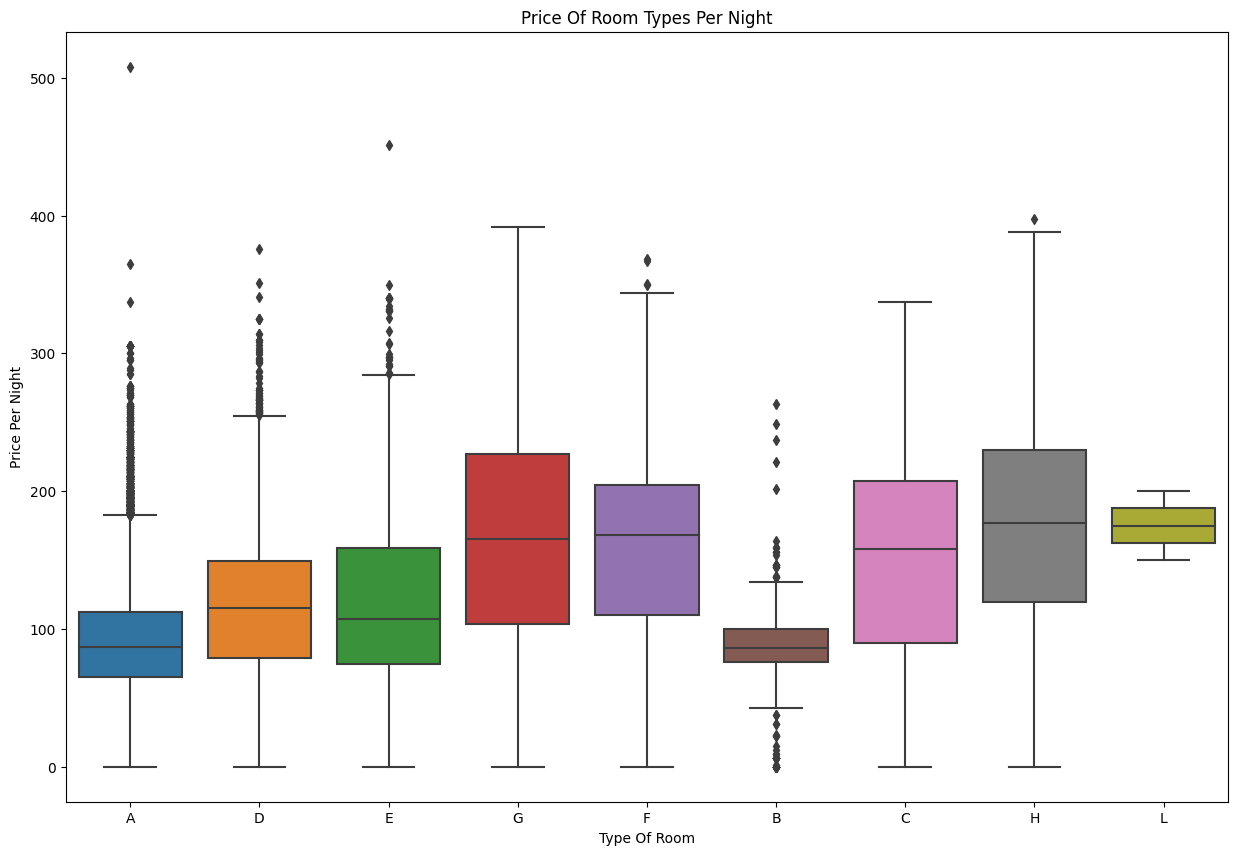

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_train[df_train['is_canceled'] == 0],x='reserved_room_type',y='adr')
plt.title('Price Of Room Types Per Night')
plt.xlabel('Type Of Room')
plt.ylabel('Price Per Night')
plt.show()

In [ ]:
df_train[df_train['is_canceled']==0].groupby('reserved_room_type')['bookingID'].count().reset_index(name='No. of Guest').sort_values(by='No. of Guest',ascending=False)

,reserved_room_type,No. of Guest
0,A,36606
3,D,9050
4,E,3202
5,F,1419
6,G,907
1,B,522
2,C,445
7,H,252
8,L,2


In [ ]:
not_canceled_data = df_train[df_train['is_canceled'] == 1]
not_canceled_counts = not_canceled_data.groupby('reserved_room_type')['bookingID'].count().reset_index(name='No. of Canceled')
canceled_counts = df_train.groupby('reserved_room_type')['bookingID'].count().reset_index(name='Total No. of Guests')

combined_data = pd.merge(not_canceled_counts, canceled_counts, on='reserved_room_type')
combined_data['Cancellation Percentage'] = (combined_data['Total No. of Guests'] - combined_data['No. of Canceled']) / combined_data['Total No. of Guests'] * 100

sorted_data = combined_data.sort_values(by='Cancellation Percentage', ascending=False)
sorted_data


,reserved_room_type,No. of Canceled,Total No. of Guests,Cancellation Percentage
4,E,1354,4556,70.280948
5,F,627,2046,69.354839
3,D,4255,13305,68.019542
2,C,212,657,67.732116
1,B,254,776,67.268041
8,L,1,3,66.666667
6,G,529,1436,63.161560
7,H,156,408,61.764706
0,A,23373,59979,61.031361


Each room type has varying prices.

The most cancellations occur for room type A, however, in terms of percentage, type A has the lowest cancellation rate. The highest cancellation rate is for type E, at around 70%.

#### 3.3 **Nightly Price Variations Across the Year**: How does the price per night fluctuate throughout the year?

In [ ]:
monthly_prices = df_train.groupby(['arrival_date_month'])['adr'].mean().reset_index()
monthly_prices

,arrival_date_month,adr
0,April,99.992556
1,August,140.195220
2,December,81.614436
3,February,73.667364
4,January,70.724881
5,July,127.591602
6,June,116.840495
7,March,80.646208
8,May,108.350342
9,November,73.740964


In [ ]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays

  Preparing metadata (setup.py) ... done
  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3419 sha256=a851692353a04b6959655c0026a55eba08e2bf5559b1cbc2af55f2e80f432ee2
  Stored in directory: /root/.cache/pip/wheels/6b/fd/39/06eaac8d65d641f9f50856a48b57a5ec8351be2874beff01ec
Successfully built sort-dataframeby-monthorweek
  Preparing metadata (setup.py) ... done
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3223 sha256=30003d1d74f07170c622ef8aa260bf52bff8461521e471a89ef13ea2fcf2a121
  Stored in directory: /root/.cache/pip/wheels/bd/b4/f6/2c29a96668a9a13a568134857fd7b7a5186261f00f1d35661c
Successfully built sorted-months-weekdays


In [ ]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [ ]:
monthly_prices = sort_month(monthly_prices, 'arrival_date_month')
monthly_prices

,arrival_date_month,adr
0,January,70.724881
1,February,73.667364
2,March,80.646208
3,April,99.992556
4,May,108.350342
5,June,116.840495
6,July,127.591602
7,August,140.195220
8,September,104.935960
9,October,87.810597


In [ ]:
plt.figure(figsize = (10, 6))

px.line(monthly_prices,
        x = 'arrival_date_month',
        y = 'adr',
        title = 'Room price per night over the Months')

<Figure size 1000x600 with 0 Axes>

August  is the peak of the summer holiday season with warm weather, resulting in hotel and accommodation prices surging due to high demand.

#### 3.4  **Busiest Months**: During which months is the hotel most occupied?

In [ ]:
num_of_guests = df_train[df_train['is_canceled']==0].groupby('arrival_date_month')['bookingID'].count().reset_index()
num_of_guests = sort_month(num_of_guests, 'arrival_date_month')
num_of_guests

,arrival_date_month,bookingID
0,January,2914
1,February,3638
2,March,4595
3,April,4604
4,May,4949
5,June,4512
6,July,5481
7,August,6012
8,September,4561
9,October,4798


In [ ]:
fig = px.line(num_of_guests, x="arrival_date_month", y="bookingID", title="Total Guest per Month")

# Change the x label
fig.update_xaxes(title="Month")

# Change the y label
fig.update_yaxes(title="Number of Guests")

fig.show()

Therefore, August sees a large number of visitors as well.

#### 3.5 **Duration of Stay**: What is the typical length of guests' stays at the hotel?

In [ ]:
df_train['duration_of_stay'] = df_train['stays_in_weekend_nights'] + df_train['stays_in_week_nights']

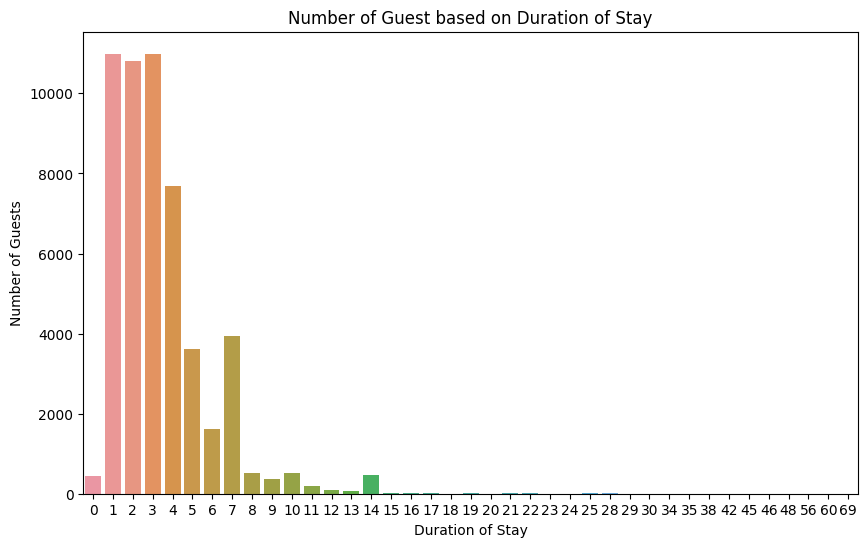

In [ ]:
duration_of_stay = df_train[df_train['is_canceled']==0].groupby('duration_of_stay')['bookingID'].count().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(x=duration_of_stay['duration_of_stay'], y=duration_of_stay['bookingID'])

plt.title('Number of Guest based on Duration of Stay')
plt.xlabel('Duration of Stay')
plt.ylabel('Number of Guests')

plt.show()

In [ ]:
canceled_data = df_train[df_train['is_canceled'] == 1]
canceled_counts = canceled_data.groupby('distribution_channel')['is_canceled'].count().reset_index(name='No. of Canceled')
total_counts = df_train.groupby('distribution_channel')['is_canceled'].count().reset_index(name='Total No. of Guests')

combined_data = pd.merge(canceled_counts, total_counts, on='distribution_channel')
combined_data['Cancellation Percentage'] = (combined_data['No. of Canceled']) / combined_data['Total No. of Guests'] * 100
combined_data

,distribution_channel,No. of Canceled,Total No. of Guests,Cancellation Percentage
0,Corporate,1026,4612,22.246314
1,Direct,1783,10130,17.601185
2,GDS,26,133,19.548872
3,TA/TO,27923,68287,40.890653
4,Undefined,3,4,75.000000


In [ ]:
canceled_data = df_train[df_train['is_canceled'] == 1]
canceled_counts = canceled_data.groupby('market_segment')['is_canceled'].count().reset_index(name='No. of Canceled')
total_counts = df_train.groupby('market_segment')['is_canceled'].count().reset_index(name='Total No. of Guests')

combined_data = pd.merge(canceled_counts, total_counts, on='market_segment')
combined_data['Cancellation Percentage'] = (combined_data['No. of Canceled']) / combined_data['Total No. of Guests'] * 100
combined_data

,market_segment,No. of Canceled,Total No. of Guests,Cancellation Percentage
0,Aviation,40,160,25.000000
1,Complementary,58,513,11.306043
2,Corporate,704,3696,19.047619
3,Direct,1346,8724,15.428702
4,Groups,8363,13781,60.685001
5,Offline TA/TO,5800,16894,34.331715
6,Online TA,14449,39397,36.675381
7,Undefined,1,1,100.000000


In [ ]:
canceled_data = df_train[df_train['is_canceled'] == 1]
canceled_counts = canceled_data.groupby('customer_type')['is_canceled'].count().reset_index(name='No. of Canceled')
total_counts = df_train.groupby('customer_type')['is_canceled'].count().reset_index(name='Total No. of Guests')

combined_data = pd.merge(canceled_counts, total_counts, on='customer_type')
combined_data['Cancellation Percentage'] = (combined_data['No. of Canceled']) / combined_data['Total No. of Guests'] * 100
combined_data

,customer_type,No. of Canceled,Total No. of Guests,Cancellation Percentage
0,Contract,854,2790,30.609319
1,Group,44,407,10.810811
2,Transient,25487,62437,40.820347
3,Transient-Party,4376,17532,24.960073


The highest number of bookings occurs for a period less than or equal to one week.


TA/TO Segment (Travel Agents/Tour Operators): The "TA/TO" distribution channel has the highest cancellation percentage, approximately 40.9%. This suggests that reservations made through travel agents or tour operators tend to have a higher likelihood of being canceled. This could be due to various factors, such as flexible booking policies or changes in travelers' plans.


Groups Segment: The "Groups" segment has a very high cancellation rate, approximately 60.7%. This may be due to large groups often experiencing changes in plans or fluctuations in the number of guests attending, which can lead to a higher rate of cancellations.

"Transient" customers have the highest cancellation rate, while "Group" customers have a relatively low cancellation rate.

#### 3.6 **Special Requests and Cancellation Relationship**: Is there a correlation between special requests made by guests and the likelihood of cancellations?

<Axes: xlabel='total_of_special_requests', ylabel='count'>

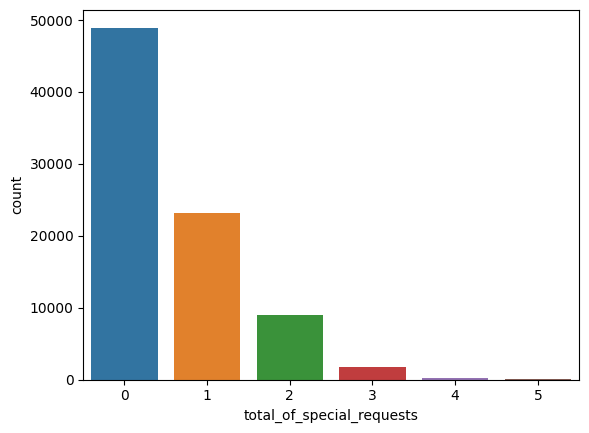

In [ ]:
sns.countplot(x=df_train.total_of_special_requests)

In [ ]:
 100 * len(df_train[df_train['total_of_special_requests'] == 0]) / len(df_train)

58.86179448332251

In [ ]:
df_train.groupby(['total_of_special_requests','is_canceled']).agg({'total_of_special_requests':'count'}).unstack()

total_of_special_requests       
is_canceled                                       0      1
total_of_special_requests                                 
0                                             25610  23343
1                                             18092   5076
2                                              7032   1999
3                                              1422    318
4                                               219     23
5                                                30      2

#### 3.7 **Cancellation Analysis Based on Lead Time**: Study the cancellation patterns in relation to the lead time before the check-in date.

In [ ]:
df_train.groupby(['lead_time','is_canceled']).agg({'bookingID':'count'}).unstack()

bookingID       
is_canceled         0      1
lead_time                   
0              4061.0  298.0
1              2169.0  236.0
2              1270.0  151.0
3              1168.0  127.0
4              1065.0  120.0
...               ...    ...
615               NaN   13.0
622               NaN   13.0
626               NaN   20.0
629               NaN   12.0
737               1.0    NaN

[477 rows x 2 columns]

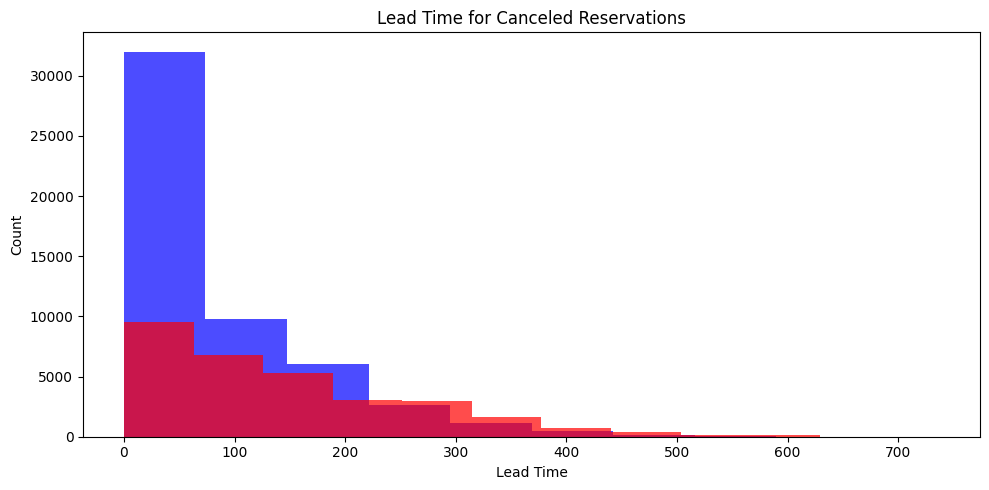

In [ ]:

# Buat dua subplot (untuk setiap status pembatalan)
plt.figure(figsize=(10, 5))
plt.subplot(1, 1,1)
plt.hist(df_train[df_train['is_canceled'] == 0]['lead_time'], bins=10, color='blue', alpha=0.7)
plt.title('Lead Time for Not Canceled Reservations')
plt.xlabel('Lead Time')
plt.ylabel('Count')

plt.subplot(1, 1,1)
plt.hist(df_train[df_train['is_canceled'] == 1]['lead_time'], bins=10, color='red', alpha=0.7)
plt.title('Lead Time for Canceled Reservations')
plt.xlabel('Lead Time')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
# Separating the data into two groups based on cancellation status
not_canceled = df_train[df_train['is_canceled'] == 0]
canceled = df_train[df_train['is_canceled'] == 1]

# Descriptive analysis for Not Canceled Reservations:
print("Descriptive for Not Canceled Reservations:")
print("Mean lead_time:", not_canceled['lead_time'].mean())
print("Median lead_time:", not_canceled['lead_time'].median())
print("Lead_time variance:", not_canceled['lead_time'].var())

# Descriptive analysis for Canceled Reservations:
print("\nDescriptive for Canceled Reservations:")
print("Mean lead_time:", canceled['lead_time'].mean())
print("Median lead_time:", canceled['lead_time'].median())
print("Lead_time variance:", canceled['lead_time'].var())

Descriptive for Not Canceled Reservations:
Mean lead_time: 80.21164011067646
Median lead_time: 45.0
Lead_time variance: 8361.933472626755

Descriptive for Canceled Reservations:
Mean lead_time: 144.56444848997106
Median lead_time: 113.0
Lead_time variance: 14032.81386478767


Some differences in "lead_time" between Not Canceled Reservations and Canceled Reservations:

1. The mean "lead_time" for Not Canceled Reservations (80.21) is lower than the mean "lead_time" for Canceled Reservations (144.56). This suggests that Not Canceled Reservations tend to have a shorter time between booking and arrival compared to Canceled Reservations.

2. The median "lead_time" for both groups also shows a similar difference. The median "lead_time" for Not Canceled Reservations is 45, while the median "lead_time" for Canceled Reservations is 113. This indicates that most Not Canceled Reservations have a shorter booking-to-arrival time compared to most Canceled Reservations.

3. The variance of "lead_time" measures the data's spread. The variance of "lead_time" for Canceled Reservations (14032.81) is higher than that for Not Canceled Reservations (8361.93). This suggests that the distribution of "lead_time" for Canceled Reservations is more spread out compared to Not Canceled Reservations.

Overall, these findings suggest that the time between booking and arrival ("lead_time") appears to influence the decision to cancel a reservation. Reservations with longer "lead_time" tend to have a higher cancellation rate than those with shorter "lead_time." However, further analysis and statistical tests may be needed to confirm this relationship significantly.

In [ ]:
# Data "lead_time" for Not Canceled and Canceled Reservations
lead_time_not_canceled = not_canceled['lead_time']
lead_time_canceled = canceled['lead_time']

# Independent t-test
t_stat, p_value = stats.ttest_ind(lead_time_not_canceled, lead_time_canceled, equal_var=False)

print("T-statistic value:", t_stat)
print("P-value:", p_value)

alpha = 0.05  # Significance level

if p_value < alpha:
    print("There is a significant difference in lead_time between canceled and not canceled reservations.")
else:
    print("There is no significant difference in lead_time between canceled and not canceled reservations.")

T-statistic value: -82.00957098651432
P-value: 0.0
There is a significant difference in lead_time between canceled and not canceled reservations.


There is a highly significant difference in "lead_time" between canceled and not canceled reservations. The very small p-value (p-value < 0.05) indicates that this difference is highly unlikely to occur by chance.

More specifically, the negative t-statistic value suggests that the average "lead_time" for canceled reservations is higher than the average "lead_time" for not canceled reservations. This confirms the findings in the previous descriptive analysis, where reservations with longer "lead_time" tend to have a higher cancellation rate.

### 4. Modelling

#### 4.1 Pre Processing

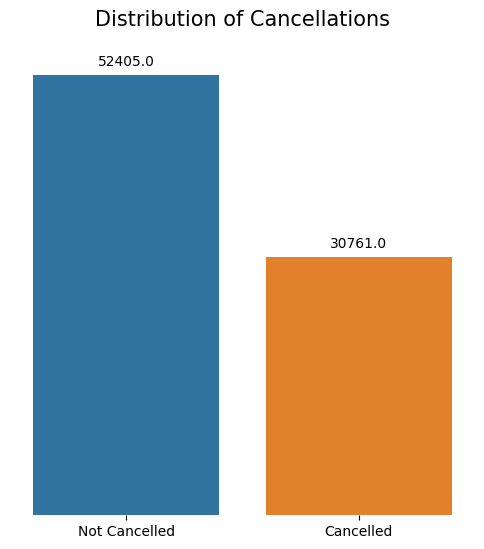

In [ ]:
# Plotting the distribution
plt.figure(figsize=(6, 6))
ax = sns.countplot(data=df_train, x='is_canceled')
plt.title('Distribution of Cancellations', pad=20, fontsize=15)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])

# Hide y-axis and x-axis tick borders
sns.despine(left=True, bottom=True)

# Changing tick labels
plt.xticks(ticks=[0, 1], labels=['Not Cancelled', 'Cancelled'])

# Adding count values above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.show()

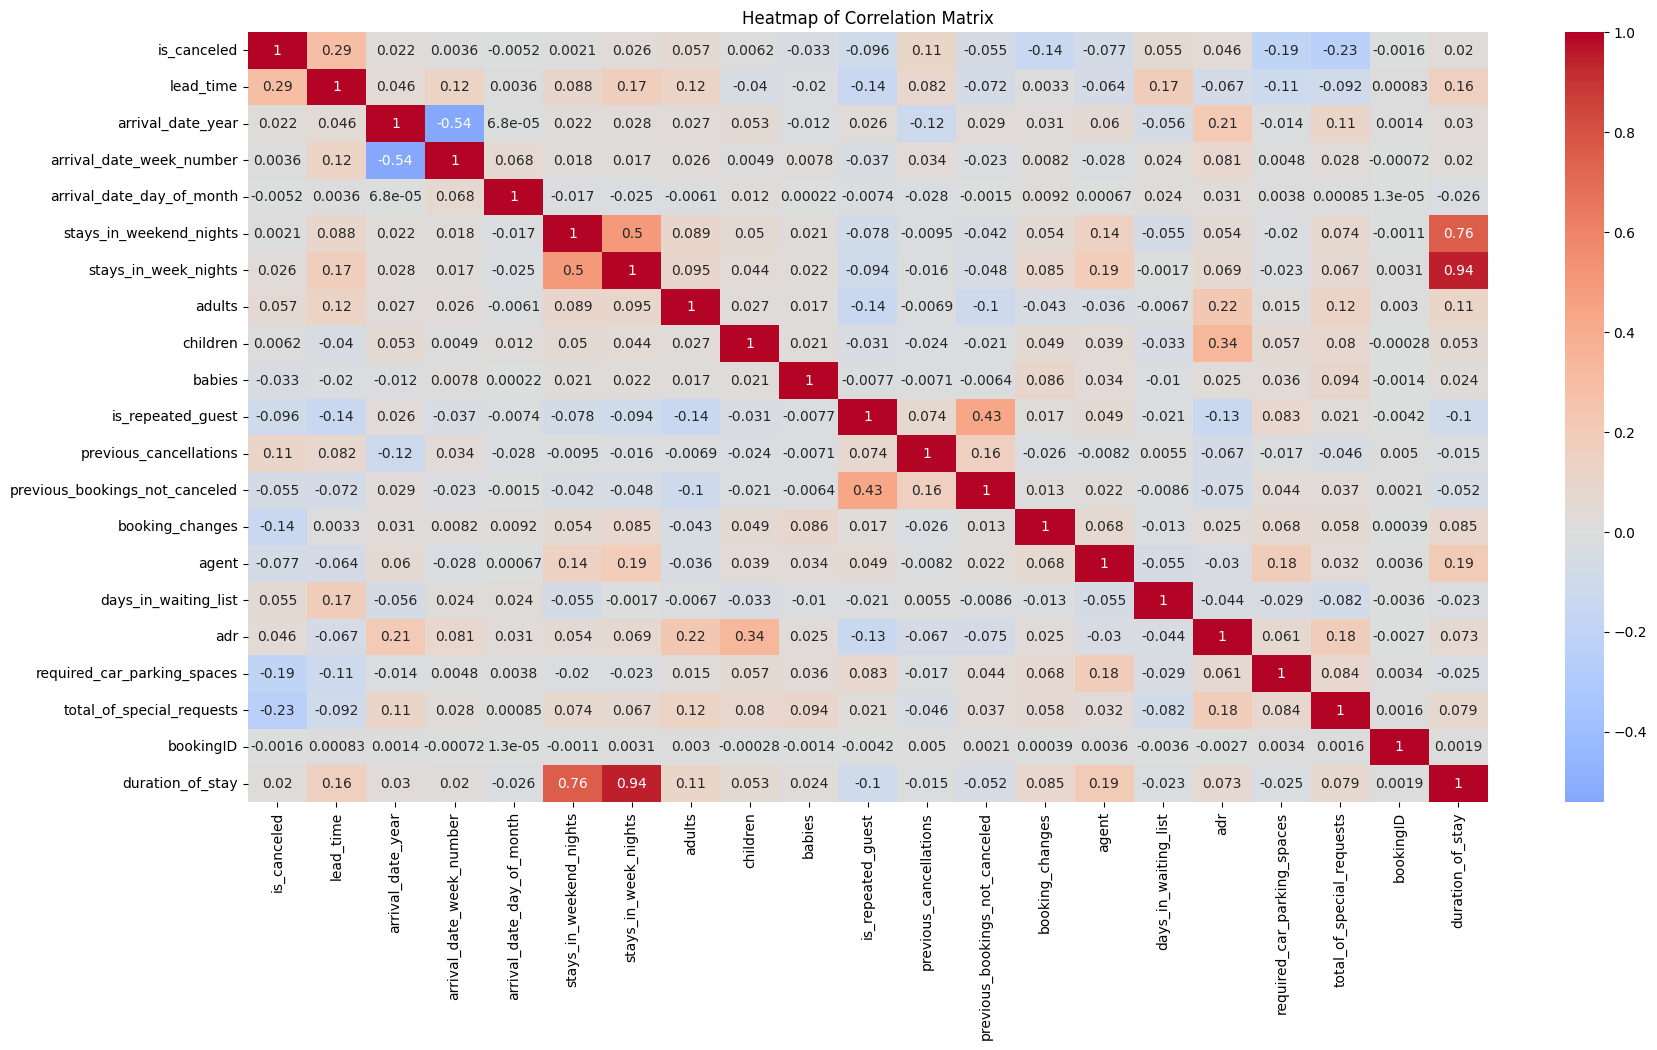

In [ ]:
numeric_columns = df_train.select_dtypes(include=[int, float]).columns

correlation_matrix = df_train[numeric_columns].corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [ ]:
correlation = df_train[numeric_columns].corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.290665
total_of_special_requests         0.234313
required_car_parking_spaces       0.193347
booking_changes                   0.143684
previous_cancellations            0.106478
is_repeated_guest                 0.096101
agent                             0.077454
adults                            0.057389
previous_bookings_not_canceled    0.055492
days_in_waiting_list              0.054893
adr                               0.045741
babies                            0.033248
stays_in_week_nights              0.026013
arrival_date_year                 0.022476
duration_of_stay                  0.020227
children                          0.006240
arrival_date_day_of_month         0.005183
arrival_date_week_number          0.003608
stays_in_weekend_nights           0.002069
bookingID                         0.001627
Name: is_canceled, dtype: float64

In [ ]:
df_train.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'bookingID',
       'duration_of_stay'],
      dtype='object')

##### 4.1.1 Feature Engineering

In [ ]:
# dropping columns that are not useful

useless_col = ['hotel',
               'arrival_date_year',
               'agent',
               'country',
               'reservation_status',
               'days_in_waiting_list',
               'reservation_status_date',
               'bookingID']

df_clean = df_train.drop(useless_col, axis = 1)

In [ ]:
# change string of month into integer (1-12)
month_map = {'January':'01',
             'February':'02',
             'March':'03',
             'April':'04',
             'May':'05',
             'June':'06',
             'July':'07',
             'August':'08',
             'September':'09',
             'October':'10',
             'November':'11',
             'December':'12'}

df_clean.arrival_date_month = df_clean.arrival_date_month.map(month_map).astype(int)

In [ ]:
#create a new column 'duration_of_stay' by adding 'stays_in_weekend_nights' and 'stays_in_week_nights'
df_clean['duration_of_stay'] = (df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']).astype(int)

In [ ]:
# Calculate the total bookings by summing previous cancellations and previous bookings not canceled
df_clean['total_bookings'] = df_clean['previous_cancellations'] + df_clean['previous_bookings_not_canceled']

In [ ]:
# Define a function to check if there is a change in room type for each row
def roomChange(row):
    if row['assigned_room_type'] == row['reserved_room_type']:
        return False
    else:
        return True

# creating a new column 'change_in_room' that indicates whether there was a change in room type for each booking entry.
df_clean['change_in_room'] = df_clean.apply(roomChange, axis=1)

In [ ]:
# Create a new column 'offspring' by adding 'children' and 'babies' columns and converting to integer
df_clean['offspring'] = (df_clean['children'] + df_clean['babies']).astype(int)

In [ ]:
df_clean.drop(['assigned_room_type', 'reserved_room_type','children','babies'], axis=1, inplace=True)

In [ ]:
df_clean[df_clean.select_dtypes(exclude=['number']).columns.tolist()].head()

,meal,market_segment,distribution_channel,deposit_type,customer_type,change_in_room
0,BB,Online TA,TA/TO,No Deposit,Transient,False
1,BB,Groups,TA/TO,Non Refund,Transient,False
2,BB,Groups,TA/TO,Non Refund,Transient,False
3,BB,Corporate,Corporate,No Deposit,Transient,False
4,BB,Offline TA/TO,TA/TO,No Deposit,Transient,False


In [ ]:
# change non numeric columns into numeric using Label Encoder
lb = LabelEncoder()

non_numeric = df_clean.select_dtypes(exclude=['number']).columns.tolist()

for item in non_numeric:
    df_clean[item] = lb.fit_transform(df_clean[item])

In [ ]:
df_clean[non_numeric].head()

,meal,market_segment,distribution_channel,deposit_type,customer_type,change_in_room
0,0,6,3,0,2,0
1,0,4,3,1,2,0
2,0,4,3,1,2,0
3,0,2,0,0,2,0
4,0,5,3,0,2,0


#### 4.2 Modelling

##### 4.2.1 Choose best model

In [ ]:
X = df_clean.drop(['is_canceled'], axis=1)
y = df_clean['is_canceled']

In [ ]:
#Data scaling
std_scaler = StandardScaler()
std_scaler.fit(X)
X_std = std_scaler.transform(X)

In [ ]:
# Define parameter grid for KNN
knn_params = {
    'n_neighbors': [3, 7, 11, 13]
}

# Create KNN model
knn_model = KNeighborsClassifier()

# Create GridSearchCV for KNN
knn_grid_search = GridSearchCV(knn_model, knn_params, cv=5, return_train_score=False)

# Fit the KNN grid search
knn_grid_search.fit(X_std, y)

# Get the best parameters and best score for KNN
best_knn_params = knn_grid_search.best_params_
best_knn_score = knn_grid_search.best_score_

In [ ]:
print(best_knn_params)
print(best_knn_score)

{'n_neighbors': 7}
0.8141909034511106


In [ ]:
# Define parameter grid for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create XGBoost model
xgb_model = XGBClassifier()

# Create GridSearchCV for XGBoost
xgb_grid_search = GridSearchCV(xgb_model, xgb_params, cv=5, return_train_score=False)

# Fit the XGBoost grid search
xgb_grid_search.fit(X_std, y)

# Get the best parameters and best score for XGBoost
best_xgb_params = xgb_grid_search.best_params_
best_xgb_score = xgb_grid_search.best_score_

In [ ]:
print(best_xgb_params)
print(best_xgb_score)

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
0.8385879148839657


In [ ]:
# Define parameter grid for Random Forest
rf_params = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20]
}

# Create Random Forest model
rf_model = RandomForestClassifier()

# Create GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(rf_model, rf_params, cv=5, return_train_score=False)

# Fit the Random Forest grid search
rf_grid_search.fit(X_std, y)

# Get the best parameters and best score for Random Forest
best_rf_params = rf_grid_search.best_params_
best_rf_score = rf_grid_search.best_score_

In [ ]:
print(best_rf_params)
print(best_rf_score)

{'max_depth': None, 'n_estimators': 100}
0.8608205629598074


In [ ]:
# Define parameter grid for Logistic Regression
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Penalty parameter (regularization strength)
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Algorithm for optimization
    'max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Create Logistic Regression model
logreg_model = LogisticRegression()

# Create GridSearchCV for Logistic Regression
logreg_grid_search = GridSearchCV(logreg_model, logreg_params, cv=5, return_train_score=False)

# Fit the Logistic Regression grid search
logreg_grid_search.fit(X_std, y)

# Get the best parameters and best score for Logistic Regression
best_logreg_params = logreg_grid_search.best_params_
best_logreg_score = logreg_grid_search.best_score_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/

In [ ]:
print(best_logreg_params)
print(best_logreg_score)

{'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
0.8015054447497472


##### 4.2.1 Save Best Model

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = df_clean.drop('is_canceled', axis=1)
y = df_clean['is_canceled']

#Encode feature from text to integers.
non_numeric = df_clean.select_dtypes(exclude=['number']).columns.tolist()
for item in non_numeric:
    df_clean[item] = lb.fit_transform(df_clean[item])

# split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# pipeline preprocessor and model
pipeline = ImbPipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(n_estimators = 100))
])

# training model
pipeline.fit(X_train, y_train)

# evaluating model
accuracy = pipeline.score(X_test, y_test)

print(f'accuracy model:',accuracy)
y_pred = pipeline.predict(X_test)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

accuracy model: 0.857039798004088
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     10471
           1       0.85      0.75      0.79      6163

    accuracy                           0.86     16634
   macro avg       0.86      0.83      0.84     16634
weighted avg       0.86      0.86      0.85     16634



In [ ]:
feature_importances = pipeline.named_steps['classifier'].feature_importances_

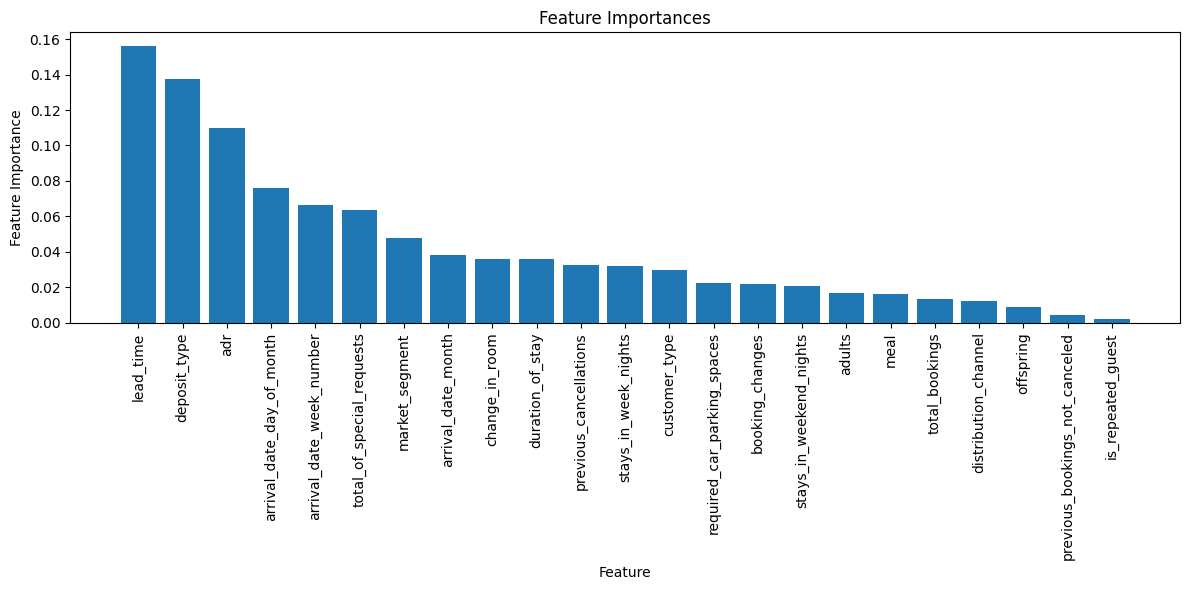

In [ ]:
model = pipeline.named_steps['classifier']

feature_importances = model.feature_importances_
original_feature_names = X_train.columns


sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = [original_feature_names[i] for i in sorted_indices]


plt.figure(figsize=(12, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Feature Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

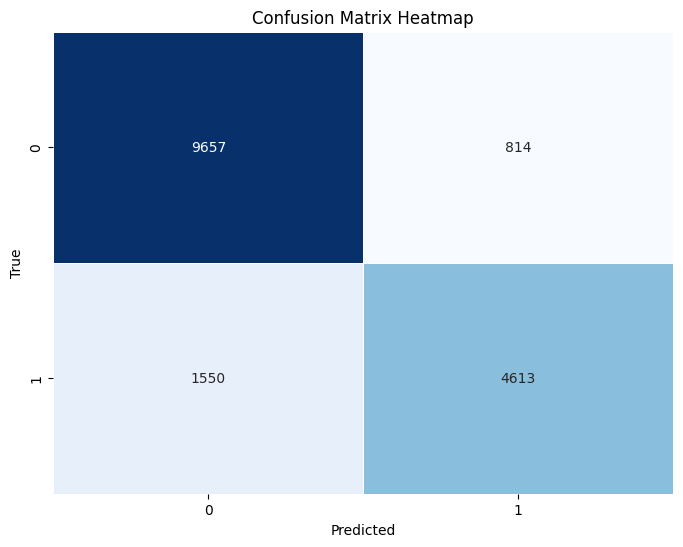

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
false_negatives = conf_matrix[1, 0]  # Jumlah False Negatives
true_positives = conf_matrix[1, 1]   # Jumlah True Positives

fnr = false_negatives / (false_negatives + true_positives)
print("False Negative Rate (FNR):", fnr)

False Negative Rate (FNR): 0.2515008924225215


In [ ]:
print("F1 Score =", f1_score(y_test, y_pred))

F1 Score = 0.7960310612597067


In [ ]:
import joblib

# Save the trained model to a file
model_filename = 'random_forest_model.pkl'
joblib.dump(pipeline, folder_path + model_filename)

print(f'Model saved as {model_filename}')


Model saved as random_forest_model.pkl


### 5. Testing

In [ ]:
X_train.columns

Index(['lead_time', 'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'deposit_type',
       'customer_type', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests', 'duration_of_stay', 'total_bookings',
       'change_in_room', 'offspring'],
      dtype='object')

In [ ]:
df_test = pd.read_csv(folder_path + 'test.csv')
df_test.head()

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293
1,Sacramento Airport Natomas Courtyard Sacrament...,98,2017,November,48,23,1,2,1,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,37.0,NaN,0,Transient-Party,70.00,0,0,Check-Out,2017-11-26,83294
2,Residence Inn Las Vegas Convention Center Las ...,171,2019,July,30,28,0,1,2,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,168.0,NaN,0,Transient,80.10,0,0,Check-Out,2019-07-29,83295
3,Courtyard by Marriott Rio de Janeiro Barra da ...,2,2018,January,1,2,0,1,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,F,0,No Deposit,240.0,NaN,0,Transient,66.00,0,1,Check-Out,2018-01-03,83296
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35698 entries, 0 to 35697
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           35698 non-null  object 
 1   lead_time                       35698 non-null  int64  
 2   arrival_date_year               35698 non-null  int64  
 3   arrival_date_month              35698 non-null  object 
 4   arrival_date_week_number        35698 non-null  int64  
 5   arrival_date_day_of_month       35698 non-null  int64  
 6   stays_in_weekend_nights         35698 non-null  int64  
 7   stays_in_week_nights            35698 non-null  int64  
 8   adults                          35698 non-null  int64  
 9   children                        35697 non-null  float64
 10  babies                          35698 non-null  int64  
 11  meal                            35698 non-null  object 
 12  country                         

In [ ]:
df_test_clean = df_test.drop(columns=['company'])

In [ ]:
df_test_clean.isnull().sum()

hotel                                0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             1
babies                               0
meal                                 0
country                            142
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             4925
days_in_waiting_list                 0
customer_type                        0
adr                      

In [ ]:
df_test_clean.children.fillna(0, inplace=True)

In [ ]:
df_test_clean = df_test_clean.drop(useless_col, axis = 1)

df_test_clean.arrival_date_month = df_test_clean.arrival_date_month.map(month_map).astype(int)
df_test_clean['duration_of_stay'] = (df_test_clean['stays_in_weekend_nights'] + df_test_clean['stays_in_week_nights']).astype(int)
df_test_clean['total_bookings'] = df_test_clean['previous_cancellations'] + df_test_clean['previous_bookings_not_canceled']
df_test_clean['change_in_room'] = df_test_clean.apply(roomChange, axis=1)
df_test_clean['offspring'] = (df_test_clean['children'] + df_test_clean['babies']).astype(int)

df_test_clean.drop(['assigned_room_type', 'reserved_room_type','children','babies'], axis=1, inplace=True)

In [ ]:
non_numeric = df_test_clean.select_dtypes(exclude=['number']).columns.tolist()
for item in non_numeric:
    df_test_clean[item] = lb.fit_transform(df_test_clean[item])

In [ ]:
# Load the saved model from a file
loaded_model = joblib.load(folder_path + 'random_forest_model.pkl')

In [ ]:
X_new_std = loaded_model.named_steps['scaler'].transform(df_test_clean)
pred = loaded_model.predict(X_new_std)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names



In [ ]:
prediction_df = pd.DataFrame({'Prediction': pred})

df_test = pd.concat([df_test, prediction_df], axis=1)

In [ ]:
prediction_df.value_counts()

Prediction
0             34801
1               897
dtype: int64

In [ ]:
df_test[(df_test['Prediction']==1 )& (df_test.reservation_status=='Canceled')]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,Prediction
15,Orlando International Drive/Convention Center ...,444,2018,December,49,1,0,3,1,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,34.0,NaN,39,Transient,75.0,0,0,Canceled,2017-10-23,83308,1
28,Irvine John Wayne Airport/Orange County Courty...,398,2018,August,33,11,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.0,0,0,Canceled,2017-10-21,83321,1
57,Marriott Puerto Vallarta Resort & Spa Puerto V...,335,2017,September,38,17,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,1,0,A,A,0,Non Refund,5.0,NaN,0,Transient,85.0,0,0,Canceled,2017-05-14,83350,1
86,"Orlando Airport Courtyard Orlando, FL",278,2018,August,33,11,0,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Transient,65.0,0,0,Canceled,2017-12-18,83379,1
90,Protea Hotel Fire & Ice! by Marriott Cape Town...,379,2017,October,44,31,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Transient,62.0,0,0,Canceled,2017-07-23,83383,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35506,"W Barcelona Barcelona, Spain",299,2017,August,33,12,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Transient-Party,62.0,0,0,Canceled,2017-07-02,118799,1
35523,"The Westin Peachtree Plaza, Atlanta Atlanta, GA",325,2017,September,37,7,1,1,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,1.0,NaN,0,Contract,62.0,0,0,Canceled,2017-01-01,118816,1
35543,"Las Vegas Marriott Las Vegas, NV",405,2018,August,33,10,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,65.0,0,0,Canceled,2017-12-09,118836,1
35557,"Greensboro Courtyard Greensboro, NC",587,2019,February,7,16,0,1,1,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,1.0,NaN,0,Transient,59.0,0,0,Canceled,2017-10-21,118850,1


In [ ]:
df_test[(df_test.reservation_status=='Canceled')]

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,bookingID,Prediction
0,Fort Worth University Drive Courtyard Fort Wor...,46,2019,July,27,3,1,0,2,0.0,0,SC,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,79.0,NaN,0,Transient,89.38,0,0,Canceled,2019-05-31,83293,0
4,"Leipzig Marriott Hotel Leipzig, Germany",167,2019,May,20,14,2,1,2,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,1,Canceled,2019-01-02,83297,0
7,Courtyard by Marriott Rio de Janeiro Barra da ...,229,2019,July,28,12,1,4,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,NaN,NaN,0,Transient,110.00,0,0,Canceled,2018-11-25,83300,0
9,"Treasure Beach, Barbados Barbados",211,2019,May,21,24,0,4,2,0.0,0,SC,NOR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,107.10,0,0,Canceled,2018-10-25,83302,0
13,Courtyard by Marriott Rio de Janeiro Barra da ...,184,2019,August,32,7,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,240.0,NaN,0,Transient,200.00,0,0,Canceled,2019-02-12,83306,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35687,"W New York – Union Square New York, NY",196,2019,May,18,1,1,3,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,3.0,NaN,39,Transient,130.00,0,0,Canceled,2018-11-25,118980,0
35689,"Anaheim Marriott Anaheim, CA",266,2018,September,37,9,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,37.0,NaN,32,Transient,105.00,0,0,Canceled,2018-01-19,118982,0
35692,"The St. Regis Osaka Osaka, Japan",122,2018,March,14,27,2,1,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,26.0,NaN,0,Transient-Party,107.00,0,1,Canceled,2018-03-27,118985,0
35694,"Mt. Laurel Courtyard Mt. Laurel, NJ",62,2019,June,23,5,1,1,2,0.0,0,SC,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,126.00,0,2,Canceled,2019-04-19,118987,0


### 6. Suggestion

For better model :
1. Addressing data imbalance by trying undersampling or oversampling techniques.
2. Conducting feature engineering to enhance model performance.
3. Model optimization by tuning hyperparameters and possibly exploring different algorithms.

Business Recommendations:
1. Taking Swift Action on Potential Cancellations: Utilize the Machine Learning model actively to monitor and identify customers who have a high likelihood of canceling their reservations.
2. Take proactive measures such as reaching out to them personally through email, phone calls, or text messages to provide special incentives or offers that can encourage them to proceed with their reservations.


